<a href="https://colab.research.google.com/github/Asif-PA/Challenging-Regression-Project/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)
n_samples = 10000

# Generate numerical features with intentional skewness
equipment_age = np.random.randint(1, 31, n_samples)  # Uniform for age

# Operating hours: lognormal distribution introduces right skew
operating_hours = np.random.lognormal(mean=8, sigma=0.75, size=n_samples)
operating_hours = np.clip(operating_hours, 500, 5000).astype(int)

maintenance_frequency = np.random.randint(1, 11, n_samples)  # Discrete uniform
usage_intensity = np.round(np.random.uniform(1, 10, n_samples), 2)

# Downtime: exponential distribution for right skew
downtime = np.random.exponential(scale=15, size=n_samples)
downtime = np.clip(downtime, 1, 50)
downtime = np.round(downtime, 2)

# Repair hours: exponential distribution for right skew
repair_hours = np.random.exponential(scale=50, size=n_samples)
repair_hours = np.clip(repair_hours, 10, 200).astype(int)

maintenance_delay = np.random.randint(0, 16, n_samples)  # Discrete uniform
failure_rate = np.random.poisson(2, n_samples)  # Poisson (naturally skewed)

# Additional numerical feature: operational temperature (affecting equipment performance)
operational_temperature = np.random.normal(loc=35, scale=10, size=n_samples)
operational_temperature = np.clip(operational_temperature, 0, 100).round(1)

# Define categorical features
equipment_types = ["Tank", "Jet", "Ship", "Drone", "Missile"]
manufacturers = ["General Dynamics", "Lockheed Martin", "Boeing", "Raytheon", "Northrop Grumman"]
deployment_locations = ["North America", "Europe", "Asia", "Middle East", "Africa"]
contract_types = ["Full Service", "Time & Materials", "Fixed Price"]

equipment_type = np.random.choice(equipment_types, n_samples)
manufacturer = np.random.choice(manufacturers, n_samples)
deployment_location = np.random.choice(deployment_locations, n_samples)
maintenance_contract_type = np.random.choice(contract_types, n_samples)

# Additional categorical features for more complexity
equipment_conditions = ["Excellent", "Good", "Average", "Poor"]
maintenance_qualities = ["High", "Medium", "Low"]

equipment_condition = np.random.choice(equipment_conditions, n_samples)
maintenance_quality = np.random.choice(maintenance_qualities, n_samples)

# Calculate base cost contributions with non-linear transformations:
base_cost = 5000
cost_from_age = (equipment_age ** 1.2) * 100
cost_from_hours = operating_hours * 0.5
cost_from_frequency = maintenance_frequency * 300
cost_from_intensity = (usage_intensity ** 2) * 100
cost_from_downtime = downtime * 20
cost_from_repair = repair_hours * 50
cost_from_delay = maintenance_delay * 40
cost_from_failure = (failure_rate ** 2) * 200

# New interaction and non-linear terms:
interaction_age_intensity = (equipment_age * usage_intensity) * 50
interaction_hours_frequency = (operating_hours * maintenance_frequency) * 0.1
nonlinear_frequency = np.sin(maintenance_frequency) * 100
temp_effect = (operational_temperature - 35) * 20  # effect from deviation from normal temp

# Define adjustments for categorical features
equipment_type_adj = {"Tank": 1000, "Jet": 2000, "Ship": 1500, "Drone": 500, "Missile": 2500}
manufacturer_adj = {"General Dynamics": 500, "Lockheed Martin": 1000, "Boeing": 800, "Raytheon": 600, "Northrop Grumman": 700}
location_adj = {"North America": 300, "Europe": 400, "Asia": 200, "Middle East": 500, "Africa": 250}
contract_adj = {"Full Service": 1000, "Time & Materials": 500, "Fixed Price": 0}

condition_adj = {"Excellent": -500, "Good": 0, "Average": 500, "Poor": 1000}
quality_adj = {"High": -300, "Medium": 0, "Low": 300}

cat_adjustments = np.array([
    equipment_type_adj[et] + manufacturer_adj[mf] + location_adj[dl] + contract_adj[ct] +
    condition_adj[ec] + quality_adj[mq]
    for et, mf, dl, ct, ec, mq in zip(equipment_type, manufacturer, deployment_location, maintenance_contract_type, equipment_condition, maintenance_quality)
])

# Introduce heteroscedastic noise: noise std increases with equipment_age
noise_std = 1500 * (1 + equipment_age / 30)

# Compute the maintenance cost with interactions and noise
maintenance_cost = (
    base_cost +
    cost_from_age +
    cost_from_hours +
    cost_from_frequency +
    cost_from_intensity +
    cost_from_downtime +
    cost_from_repair +
    cost_from_delay +
    cost_from_failure +
    interaction_age_intensity +
    interaction_hours_frequency +
    nonlinear_frequency +
    temp_effect +
    cat_adjustments +
    np.random.normal(0, noise_std)
)

# Inject outliers: for 5% of the data, multiply the cost by a random factor between 1.5 and 3
outlier_idx = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
maintenance_cost[outlier_idx] *= np.random.uniform(1.5, 3.0, len(outlier_idx))

# Build the DataFrame
data = pd.DataFrame({
    'Equipment_Age': equipment_age,
    'Operating_Hours': operating_hours,
    'Maintenance_Frequency': maintenance_frequency,
    'Usage_Intensity': usage_intensity,
    'Downtime': downtime,
    'Repair_Hours': repair_hours,
    'Maintenance_Delay': maintenance_delay,
    'Failure_Rate': failure_rate,
    'Operational_Temperature': operational_temperature,
    'Equipment_Type': equipment_type,
    'Manufacturer': manufacturer,
    'Deployment_Location': deployment_location,
    'Maintenance_Contract_Type': maintenance_contract_type,
    'Equipment_Condition': equipment_condition,
    'Maintenance_Quality': maintenance_quality,
    'Maintenance_Cost': maintenance_cost
})

# Save the dataset to a CSV file
data.to_csv("challenging_skewed_defense_maintenance_dataset_v2.csv", index=False)
print("CSV file 'challenging_skewed_defense_maintenance_dataset_v2.csv' with 8,000 rows has been generated!")

CSV file 'challenging_skewed_defense_maintenance_dataset_v2.csv' with 8,000 rows has been generated!


In [ ]:
df=pd.read_csv('/content/challenging_skewed_defense_maintenance_dataset_v2.csv')

In [ ]:
df.head()

,Equipment_Age,Operating_Hours,Maintenance_Frequency,Usage_Intensity,Downtime,Repair_Hours,Maintenance_Delay,Failure_Rate,Operational_Temperature,Equipment_Type,Manufacturer,Deployment_Location,Maintenance_Contract_Type,Equipment_Condition,Maintenance_Quality,Maintenance_Cost
0,7,866,1,2.62,10.35,10,4,2,38.1,Jet,Raytheon,Middle East,Full Service,Poor,Medium,13963.565322
1,20,4691,1,7.26,1.11,10,14,0,40.8,Jet,Lockheed Martin,Middle East,Fixed Price,Good,High,27346.157083
2,29,1795,2,8.09,7.28,200,2,1,36.1,Jet,Northrop Grumman,Africa,Fixed Price,Good,Medium,37618.548420
3,15,917,5,5.02,6.59,10,0,6,29.6,Jet,Boeing,Middle East,Full Service,Poor,Medium,31025.141334
4,11,1643,9,3.91,2.62,16,14,1,27.1,Drone,Lockheed Martin,Middle East,Full Service,Excellent,Low,20063.499990


In [ ]:
df.isnull().sum()

,0
Equipment_Age,0
Operating_Hours,0
Maintenance_Frequency,0
Usage_Intensity,0
Downtime,0
Repair_Hours,0
Maintenance_Delay,0
Failure_Rate,0
Operational_Temperature,0
Equipment_Type,0


In [ ]:
df.shape

(10000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment_Age              10000 non-null  int64  
 1   Operating_Hours            10000 non-null  int64  
 2   Maintenance_Frequency      10000 non-null  int64  
 3   Usage_Intensity            10000 non-null  float64
 4   Downtime                   10000 non-null  float64
 5   Repair_Hours               10000 non-null  int64  
 6   Maintenance_Delay          10000 non-null  int64  
 7   Failure_Rate               10000 non-null  int64  
 8   Operational_Temperature    10000 non-null  float64
 9   Equipment_Type             10000 non-null  object 
 10  Manufacturer               10000 non-null  object 
 11  Deployment_Location        10000 non-null  object 
 12  Maintenance_Contract_Type  10000 non-null  object 
 13  Equipment_Condition        10000 non-null  obje

In [ ]:
df.describe()

,Equipment_Age,Operating_Hours,Maintenance_Frequency,Usage_Intensity,Downtime,Repair_Hours,Maintenance_Delay,Failure_Rate,Operational_Temperature,Maintenance_Cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,15.728400,3091.463500,5.516600,5.463062,14.477603,49.473300,7.55820,1.996800,35.047300,29967.150220
std,8.656057,1490.130771,2.841678,2.588235,13.115338,44.849489,4.57361,1.419011,10.075173,11667.946654
min,1.000000,500.000000,1.000000,1.000000,1.000000,10.000000,0.00000,0.000000,0.000000,9720.497135
25%,8.000000,1771.000000,3.000000,3.210000,4.260000,14.000000,4.00000,1.000000,28.300000,22699.970984
50%,16.000000,2965.000000,5.000000,5.480000,10.270000,34.000000,8.00000,2.000000,35.000000,27977.353220
75%,23.000000,4925.250000,8.000000,7.670000,20.902500,69.000000,12.00000,3.000000,41.900000,34455.301896
max,30.000000,5000.000000,10.000000,10.000000,50.000000,200.000000,15.00000,10.000000,72.600000,127996.073772


In [ ]:
categorical_features = ["Equipment_Type", "Manufacturer", "Deployment_Location", "Maintenance_Contract_Type", "Equipment_Condition", "Maintenance_Quality"]
numerical_features = [col for col in df.columns if col not in categorical_features]

In [ ]:
numerical_features

['Equipment_Age',
 'Operating_Hours',
 'Maintenance_Frequency',
 'Usage_Intensity',
 'Downtime',
 'Repair_Hours',
 'Maintenance_Delay',
 'Failure_Rate',
 'Operational_Temperature',
 'Maintenance_Cost']

<ipython-input-10-4582f374ad1e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


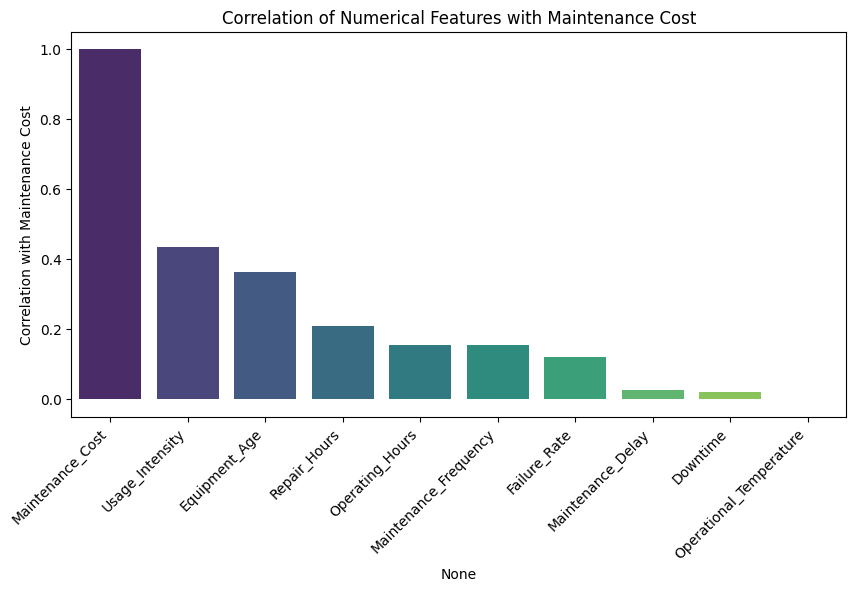

Maintenance_Cost           1.000000
Usage_Intensity            0.435017
Equipment_Age              0.362830
Repair_Hours               0.207379
Operating_Hours            0.153931
Maintenance_Frequency      0.153626
Failure_Rate               0.119155
Maintenance_Delay          0.024967
Downtime                   0.021300
Operational_Temperature   -0.000386
Name: Maintenance_Cost, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[numerical_features].corr()

#correlation of each numerical feature with Maintenance_Cost
correlation_with_target = correlation_matrix["Maintenance_Cost"].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Correlation with Maintenance Cost")
plt.title("Correlation of Numerical Features with Maintenance Cost")
plt.show()
print(correlation_with_target)


<Figure size 1200x800 with 0 Axes>

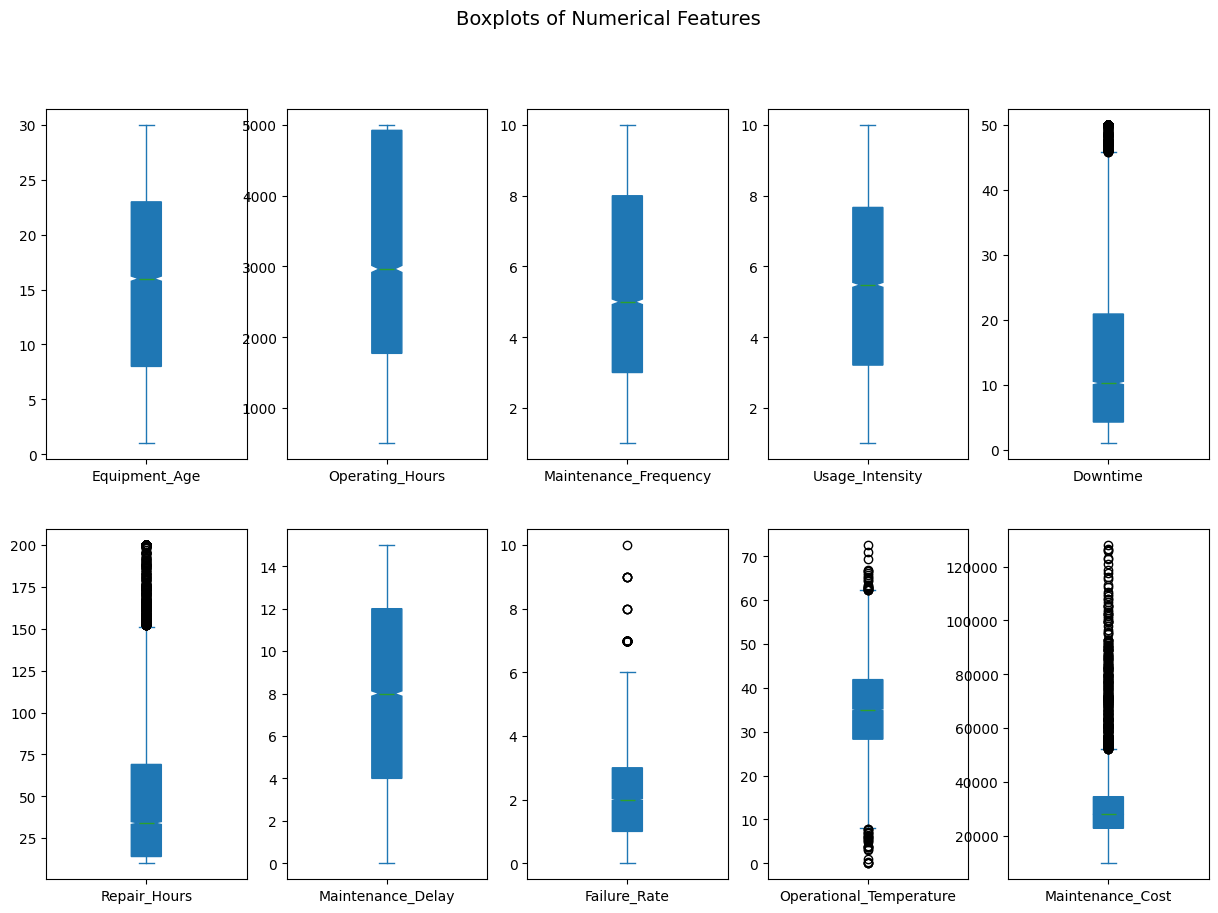

In [ ]:
plt.figure(figsize=(12, 8))
df[numerical_features].plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 10), patch_artist=True, notch=True)
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.show()

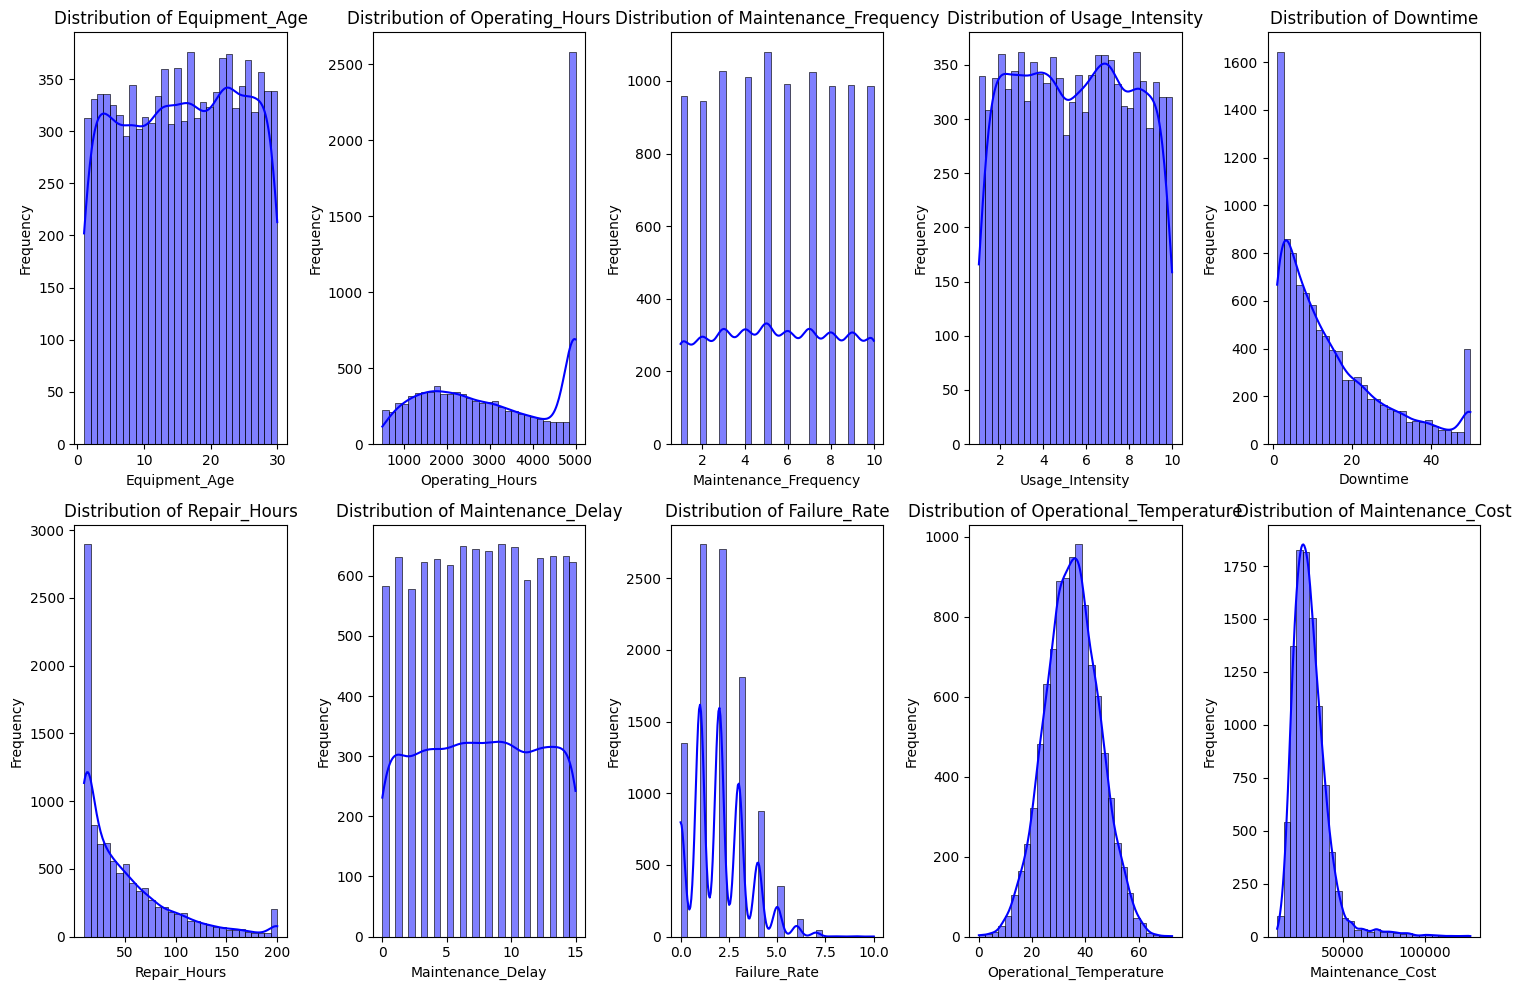

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

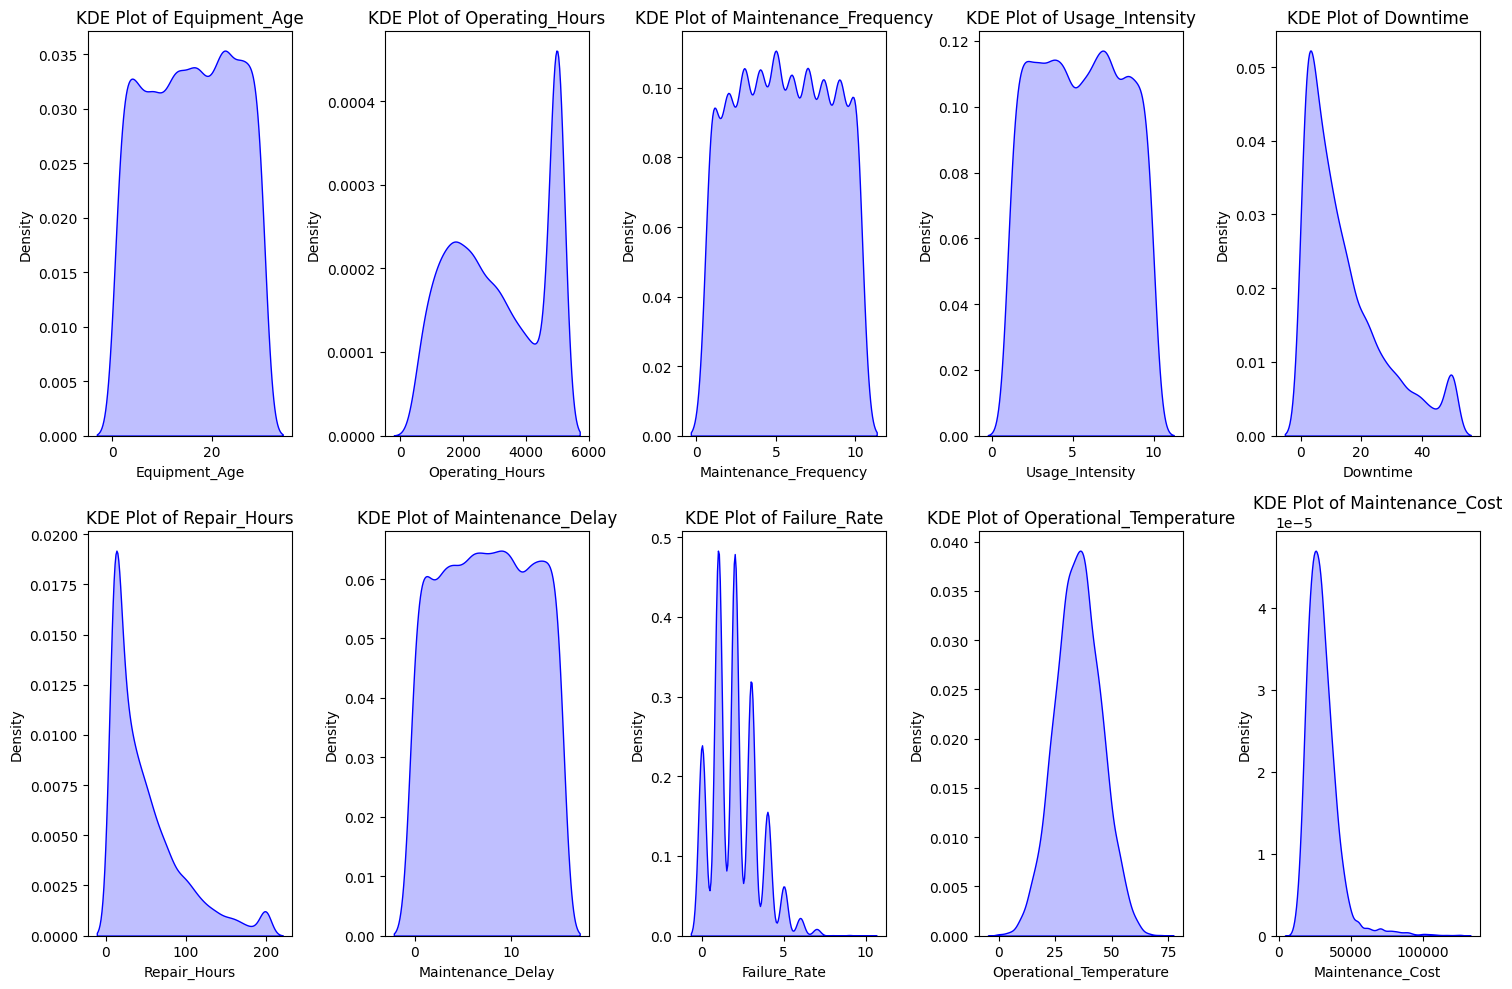

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import  PowerTransformer

In [ ]:
power_transformer = PowerTransformer()
df[numerical_features] = power_transformer.fit_transform(df[numerical_features])

In [ ]:
for col in categorical_features:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 50)


Value counts for Equipment_Type:
Equipment_Type
Jet        2071
Tank       1995
Drone      1992
Missile    1986
Ship       1956
Name: count, dtype: int64
--------------------------------------------------
Value counts for Manufacturer:
Manufacturer
Lockheed Martin     2026
Boeing              2016
Northrop Grumman    2009
General Dynamics    1979
Raytheon            1970
Name: count, dtype: int64
--------------------------------------------------
Value counts for Deployment_Location:
Deployment_Location
Middle East      2051
Asia             2006
Africa           2000
Europe           1979
North America    1964
Name: count, dtype: int64
--------------------------------------------------
Value counts for Maintenance_Contract_Type:
Maintenance_Contract_Type
Full Service        3350
Time & Materials    3346
Fixed Price         3304
Name: count, dtype: int64
--------------------------------------------------
Value counts for Equipment_Condition:
Equipment_Condition
Good         2555
Excell

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
ordinal_features = ["Equipment_Condition", "Maintenance_Quality"]
onehot_features = ["Equipment_Type", "Manufacturer", "Deployment_Location", "Maintenance_Contract_Type"]

equipment_condition_order = ["Poor", "Average", "Good", "Excellent"]
maintenance_quality_order = ["Low", "Medium", "High"]



In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[equipment_condition_order, maintenance_quality_order])
onehot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')  # Drop first to avoid multicollinearity

df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])
df_onehot = pd.DataFrame(onehot_encoder.fit_transform(df[onehot_features]).toarray(),
                         columns=onehot_encoder.get_feature_names_out(onehot_features))

df = df.drop(columns=onehot_features).reset_index(drop=True)
df = pd.concat([df, df_onehot], axis=1)

In [ ]:
df

,Equipment_Age,Operating_Hours,Maintenance_Frequency,Usage_Intensity,Downtime,Repair_Hours,Maintenance_Delay,Failure_Rate,Operational_Temperature,Equipment_Condition,...,Manufacturer_General Dynamics,Manufacturer_Lockheed Martin,Manufacturer_Northrop Grumman,Manufacturer_Raytheon,Deployment_Location_Asia,Deployment_Location_Europe,Deployment_Location_Middle East,Deployment_Location_North America,Maintenance_Contract_Type_Full Service,Maintenance_Contract_Type_Time & Materials
0,-0.981603,-1.609493,-1.700815,-1.100059,0.034100,-1.368023,-0.716418,0.156446,0.305717,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.531669,1.049980,-1.700815,0.715578,-1.654028,-1.368023,1.327258,-1.734128,0.572759,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.441394,-0.827742,-1.260246,1.005485,-0.304769,1.887020,-1.227961,-0.629151,0.107643,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.012853,-1.561516,-0.119148,-0.111009,-0.396360,-1.368023,-1.846341,2.217117,-0.537838,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.477913,-0.945263,1.189657,-0.551529,-1.143664,-0.813217,1.327258,-0.629151,-0.786891,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.046337,1.225220,1.493775,1.511653,1.587485,0.975845,1.144237,-0.629151,-1.537261,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9996,1.343852,0.546492,0.556511,-0.912006,-0.130531,1.264459,0.573399,1.323293,-0.299178,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,-1.255134,1.225220,-1.700815,1.264601,-0.892930,-1.368023,-1.846341,0.156446,1.647100,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9998,0.945408,-0.707952,-1.260246,-0.700119,1.316980,1.887020,0.767672,0.156446,0.641927,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = df.drop(columns=["Maintenance_Cost"])
y = df["Maintenance_Cost"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Since this is a challenging datset, we will try stacking regressor first with random forest and boosting algorithm**

In [ ]:
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)

# Stacking
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    passthrough=True
)

stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=300,
                                                         random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, devic...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=GradientBoostingRegressor(random_state=42),
                  passthrough=True)

In [ ]:
y_pred = stacking_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Stacking Regression Performance:")
print(f"R^2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")


Stacking Regression Performance:
R^2 Score: 0.6730
MAE: 0.35


**Trying out importnat algorithm individauly**

In [ ]:
df=pd.read_csv("/content/challenging_skewed_defense_maintenance_dataset_v2.csv")

In [ ]:
X = df.drop(columns=["Maintenance_Cost"])
y = df["Maintenance_Cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = [
    'Equipment_Age', 'Operating_Hours', 'Maintenance_Frequency', 'Usage_Intensity',
    'Downtime', 'Repair_Hours', 'Maintenance_Delay', 'Failure_Rate',
    'Operational_Temperature'
]

categorical_features = [
    'Equipment_Type', 'Manufacturer', 'Deployment_Location', 'Maintenance_Contract_Type'
]

ordinal_features = ['Equipment_Condition', 'Maintenance_Quality']
ordinal_categories = [
    ['Poor', 'Average', 'Good', 'Excellent'],
    ['Low', 'Medium', 'High']  #
]

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

#ordinal encoding for ordered features
ordinal_enc = OrdinalEncoder(categories=ordinal_categories)
X_train_ord = ordinal_enc.fit_transform(X_train[ordinal_features])
X_test_ord = ordinal_enc.transform(X_test[ordinal_features])
X_train_final = np.hstack([X_train[numerical_features], X_train_ohe, X_train_ord])
X_test_final = np.hstack([X_test[numerical_features], X_test_ohe, X_test_ord])


**Random forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)



In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Performance:")
print(f"R^2 Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")

Random Forest Performance:
R^2 Score: 0.3910
MAE: 4841.48


**XGBoost**

In [ ]:
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_final, y_train)
y_pred_xgb = xgb_model.predict(X_test_final)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"R^2 Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.2f}")


XGBoost Performance:
R^2 Score: 0.4113
MAE: 4484.44


**Trying Out Polynomial fetures with ridge regression With Hyper parameter tuning**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("challenging_skewed_defense_maintenance_dataset_v2.csv")

df = pd.get_dummies(df, drop_first=True)
X = df.drop("Maintenance_Cost", axis=1)
y = df["Maintenance_Cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)




In [ ]:
#hyper parametr tuning
param_grid = {"alpha": [0.1, 1, 10, 50, 100, 500, 1000]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

y_pred = grid_search.best_estimator_.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Ridge Alpha: {grid_search.best_params_['alpha']}")
print(f"Polynomial Regression Performance:")
print(f"R^2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Best Ridge Alpha: 1000
Polynomial Regression Performance:
R^2 Score: 0.4385
MAE: 4171.99
RMSE: 8584.98


**Trying out Catboost and lightgb with feature selection**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

df = pd.read_csv("challenging_skewed_defense_maintenance_dataset_v2.csv")



In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("Maintenance_Cost")
cat_features = df.select_dtypes(include=["object"]).columns.tolist()

# yeo-johnson transformation on skewed numerical features
pt = PowerTransformer(method='yeo-johnson')
df[num_features] = pt.fit_transform(df[num_features])



In [ ]:
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
X = df.drop(columns=["Maintenance_Cost"])
y = df["Maintenance_Cost"]
# normalize the target variable with log function
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


In [ ]:
# Feature Selection using RFE
ridge = Ridge(alpha=1000)
rfe = RFE(estimator=ridge, n_features_to_select=50)
X_train_poly = rfe.fit_transform(X_train_poly, y_train)
X_test_poly = rfe.transform(X_test_poly)


In [ ]:
param_grid = {"alpha": [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train_poly, y_train)

best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best Ridge Alpha: {grid_search.best_params_['alpha']}")
print(f"Polynomial Regression Performance:")
print(f"R^2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Best Ridge Alpha: 10
Polynomial Regression Performance:
R^2 Score: 0.6358
MAE: 0.11
RMSE: 0.20


In [ ]:
# CatBoost and LightGBM
catboost = CatBoostRegressor(verbose=0, random_state=42)
lightgbm = LGBMRegressor(random_state=42)

catboost.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
for model, name in zip([catboost, lightgbm], ["CatBoost", "LightGBM"]):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} Regression Performance:")
    print(f"R^2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}\n")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 28
[LightGBM] [Info] Start training from score 10.250145
CatBoost Regression Performance:
R^2 Score: 0.6360
MAE: 0.12
RMSE: 0.20

LightGBM Regression Performance:
R^2 Score: 0.6283
MAE: 0.12
RMSE: 0.20

